In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
""" 
i.	Read the given dataset apy_1.csv
ii.	Drop the rows with missing values if any
"""

crop_data = pd.read_csv("apy_1.csv", index_col= 0)


1. Which of the following statement(s) is/are TRUE?
 The overall production during the Kharif season is 1,195,933,000 (approx.)
 The overall production during the Summer season is 34,549,800 (approx.)
 The overall production during the Autumn season is 19,690,400 (approx.)
 None of the above
"""




In [3]:
crop_data.info()
crop_data.dropna(axis= 0, inplace=True)
crop_data.isnull().sum()

crop_data.groupby("Season")["Production"].sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73827 entries, 0 to 73826
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     73827 non-null  object 
 1   District_Name  73827 non-null  object 
 2   Crop_Year      73827 non-null  int64  
 3   Season         73827 non-null  object 
 4   Crop           73827 non-null  object 
 5   Area           73827 non-null  float64
 6   Production     72731 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.5+ MB


Season
Autumn         1.969044e+07
Summer         4.920665e+07
Winter         1.321746e+08
Rabi           6.151127e+08
Kharif         1.195933e+09
Whole Year     4.315616e+10
Name: Production, dtype: float64

2. Which of the following set of crop(s) is/are produced during the Whole year season? (select option with all that apply)
 Sugarcane, Garlic, Mango, Arhar/Tur
 Paddy, Maize, Moong (Green Gram), Onion, Apple
 Banana, Coriander, Gram, Rapeseed & Mustard, Sweet lime
 Cabbage, Bitter Gourd, Masoor, Cucumber

In [4]:
np.unique(crop_data["Season"])

whole_year = crop_data.loc[crop_data["Season"] == 'Whole Year ']

np.unique(whole_year["Crop"])

whole_yearcrop = set(np.unique(whole_year["Crop"]))

print(whole_yearcrop)

croplist = { 'a' : ['Sugarcane', 'Garlic', 'Mango', 'Arhar/Tur'], 'b' : ['Paddy', 'Maize', 'Moong (Green Gram)', 'Onion', 
            'Apple'] , 'c' : ['Banana', 'Coriander', 'Gram', 'Rapeseed & Mustard', 
            'Sweet lime'], 'd' : ['Cabbage', 'Bitter Gourd', 'Masoor', 'Cucumber']  }
croplist.keys()
croplist.values()

for k in croplist.keys():
    if set(croplist[k]) & whole_yearcrop == set(croplist[k]):
        print(k, "is present")
    else:
        print(k, "is not present")

{'Grapes', 'Carrot', 'Rubber', 'Sunflower', 'Bajra', 'Peas & beans (Pulses)', 'Sugarcane', 'Cardamom', 'Bitter Gourd', 'Jute & mesta', 'Ber', 'Cabbage', 'Onion', 'Beans & Mutter(Vegetable)', 'Total foodgrain', 'Wheat', 'Coconut ', 'Arecanut', 'Rapeseed &Mustard', 'Masoor', 'Plums', 'Ribed Guard', 'Kapas', 'Tobacco', 'Moth', 'Litchi', 'Sannhamp', 'Castor seed', 'Khesari', 'Bhindi', 'Brinjal', 'Pear', 'Guar seed', 'Pulses total', 'Niger seed', 'Peas  (vegetable)', 'Oilseeds total', 'Sweet potato', 'Lab-Lab', 'Apple', 'Drum Stick', 'other fibres', 'Ash Gourd', 'Mesta', 'Cashewnut Raw', 'Bottle Gourd', 'Cashewnut Processed', 'Other Vegetables', 'Pump Kin', 'Jowar', 'Rice', 'Safflower', 'Arhar/Tur', 'Sesamum', 'Linseed', 'Papaya', 'Pome Granet', 'Dry chillies', 'Small millets', 'Cashewnut', 'Ragi', 'Ginger', 'Pome Fruit', 'Peach', 'Jack Fruit', 'Urad', 'Moong(Green Gram)', 'Atcanut (Raw)', 'Gram', 'Pineapple', 'Yam', 'Cucumber', 'Other Fresh Fruits', 'Banana', 'Turmeric', 'Garlic', 'Redish'

In [5]:
# Or you can do individual options as set
a = set (['Sugarcane', 'Garlic', 'Mango', 'Arhar/Tur'])
if (a & whole_yearcrop) == a :
    print ("Present")
else:
    print("Not Present")

Present


3.Which district in India has the lowest crop production?
 Coimbatore
 Thrissur
 Kannur
 Mumbai

In [6]:

crop_data.groupby("District_Name")["Production"].sum().sort_values(ascending = True)

District_Name
MUMBAI                2.000000e+00
HYDERABAD             3.060000e+02
NAMSAI                7.940000e+02
RAMGARH               8.930000e+02
RAMBAN                1.578000e+03
                          ...     
THIRUVANANTHAPURAM    2.963416e+09
KASARAGOD             3.479150e+09
THRISSUR              3.681628e+09
MALAPPURAM            4.375478e+09
KOZHIKODE             6.012791e+09
Name: Production, Length: 646, dtype: float64

4. 
During which year did West Bengal have the highest crop production?

In [7]:
np.unique(crop_data["State_Name"])
crop_data.loc[crop_data["State_Name"] == 'West Bengal' ].groupby("Crop_Year")["Production"].sum().sort_values()

Crop_Year
2001      7689550.7
2000      8323849.0
2004      8608367.5
1999      9195580.0
2005      9494050.0
1998      9988608.3
2008     10030521.0
2011     10949803.0
2010     12338035.0
2002     12559002.1
2013     13494606.0
2012     13498244.0
2003     14170705.6
2009     14476077.0
2014     18302156.0
1997     22472430.0
2006    173250298.0
2007    201537048.0
Name: Production, dtype: float64

5.Which state in India has the second highest crop production? (Overall, for all years)
 Andhra Pradesh
 Tamil Nadu
 Kerala
 Uttar Pradesh

In [8]:

crop_data.groupby("State_Name")["Production"].sum().sort_values(ascending = False)


State_Name
Kerala                         3.314056e+10
Tamil Nadu                     4.045188e+09
Andhra Pradesh                 3.595973e+09
Uttar Pradesh                  9.890559e+08
Assam                          6.019920e+08
West Bengal                    5.703789e+08
Maharashtra                    3.621771e+08
Andaman and Nicobar Islands    2.936291e+08
Karnataka                      2.640385e+08
Goa                            2.367726e+08
Punjab                         1.710590e+08
Gujarat                        1.500758e+08
Madhya Pradesh                 1.300390e+08
Bihar                          1.125670e+08
Telangana                      9.946250e+07
Haryana                        9.644999e+07
Rajasthan                      8.756090e+07
Puducherry                     7.539482e+07
Odisha                         4.635979e+07
Uttarakhand                    3.685920e+07
Chhattisgarh                   3.260849e+07
Himachal Pradesh               5.828741e+06
Meghalaya            

6. How are the variables Area and Production correlated?
 There exists a positive correlation between Area and Production
 There exists a negative correlation between Area and Production
 Area and Production are not correlated
 Cannot be determined

In [9]:
crop_data.corr() # No correlation

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.023267,0.007422
Area,-0.023267,1.000000,0.041043
Production,0.007422,0.041043,1.000000


7.What is the average crop production?
 17,065,810.29 (approx.)
 50,857.44 (approx.)
 242,361.35 (approx.)
 621,031.95 (approx.)

In [10]:
np.mean(crop_data["Production"])

621031.9533575779

8. 
 What is the standard deviation of production?
 17,497,558.29 (approx.)
 50,857.44 (approx.)
 242,361.35 (approx.)
 582,503.45 (approx.)

In [11]:
np.std(crop_data["Production"])

17497437.99787031

9. Due to some unknown reasons, the crop production for only two states was recorded for 2015. Which states are they?
 Tamil Nadu and Kerala
 Kerala and Andhra Pradesh
 Odisha and Sikkim
 Sikkim and Punjab

In [12]:
crop_data.loc[crop_data["Crop_Year"] == 2015].groupby("State_Name").value_counts()

State_Name  District_Name   Crop_Year  Season       Crop               Area     Production
Odisha      ANUGUL          2015       Autumn       Maize              472.0    548.1         1
            MALKANGIRI      2015       Summer       Maize              15.0     18.3          1
                                       Winter       Rice               86000.0  120000.0      1
                                                    Sesamum            6555.0   1173.3        1
            MAYURBHANJ      2015       Autumn       Sesamum            77.0     27.9          1
                                                                                             ..
Sikkim      SOUTH DISTRICT  2015       Rabi         Rapeseed &Mustard  1233.0   1150.0        1
                                                    Wheat              110.0    118.0         1
            WEST DISTRICT   2015       Kharif       Rice               3016.0   5851.0        1
                                             

10.
The top three produced crops in the year 2005 are ______
 Wheat, Potato, Rice
 Coconut, Potato, Sugarcane
 Coconut, Sugarcane, Rice
 Sugarcane, Rice, Wheat

In [13]:
crop_data.loc[crop_data["Crop_Year"] == 2005].groupby("Crop")["Production"].sum().sort_values()

Crop
other oilseeds             1.320000e+02
Cardamom                   6.330000e+02
Sannhamp                   1.520500e+03
Oilseeds total             4.066000e+03
Other Cereals & Millets    1.771840e+04
Niger seed                 2.178100e+04
Cashewnut                  2.552022e+04
Other  Rabi pulses         3.138100e+04
Black pepper               3.699095e+04
Linseed                    4.511500e+04
Other Kharif pulses        4.870190e+04
Horse-gram                 5.050140e+04
Moth                       5.253100e+04
Peas & beans (Pulses)      6.438700e+04
Tobacco                    7.230860e+04
Small millets              9.555200e+04
Castor seed                9.884800e+04
Turmeric                   1.023300e+05
Coriander                  1.072420e+05
Safflower                  1.135730e+05
Masoor                     1.199445e+05
Khesari                    1.374330e+05
Sweet potato               1.395124e+05
Guar seed                  1.863670e+05
Mesta                      1.913420

11. State whether the given statements are True or False

I.Crop year and Area are weakly correlated
II.Crop year and Production are strongly correlated

In [14]:
crop_data.corr() # 1 true , 2 is false

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.023267,0.007422
Area,-0.023267,1.000000,0.041043
Production,0.007422,0.041043,1.000000


12. 
Which year has the lowest crop production?
 2011
 2010
 2015
 2009

In [15]:
crop_data.groupby("Crop_Year")["Production"].sum().sort_values()

Crop_Year
2015    2.114047e+06
1997    2.768054e+08
1998    5.356398e+08
2014    1.390088e+09
2003    1.394080e+09
2007    1.771568e+09
1999    1.873175e+09
2000    1.964593e+09
2013    2.023688e+09
2008    2.088889e+09
2002    2.616621e+09
2010    2.654638e+09
2005    2.892020e+09
2001    3.086705e+09
2006    3.709813e+09
2009    3.739178e+09
2012    3.876649e+09
2004    3.896185e+09
2011    5.375825e+09
Name: Production, dtype: float64

13.The crop that Maharashtra produced the most is ________
 Sugarcane
 Rice
 Banana
 Coconut

In [16]:
crop_data.loc[crop_data.State_Name == 'Maharashtra'].groupby("Crop")["Production"].sum().sort_values()


Crop
Tobacco                         2100.0
Pulses total                    3173.0
other oilseeds                  4500.0
Rapeseed &Mustard              12999.0
Castor seed                    15151.5
Total foodgrain                28818.0
Other Cereals & Millets        42500.0
Linseed                        42612.0
Tomato                         57970.0
Small millets                  76400.0
Niger seed                     76692.0
Sesamum                       107764.0
Other  Rabi pulses            148552.0
Grapes                        152147.0
Other Kharif pulses           169240.0
Mango                         195730.0
Safflower                     605498.0
Sunflower                     670642.0
Ragi                          860385.0
Banana                        862240.0
Urad                         1177100.0
Moong(Green Gram)            1269842.0
Onion                        1473341.0
Groundnut                    1938415.0
Arhar/Tur                    3588511.0
Gram                

14.Prepare the dataset further by following the steps given below: 
	●Ensure the datatypes of the columns are appropriate
	●Drop all the variables except “Area” and “Production”
	●Split the data into the train (80%) and test (20%) sets, and set the random state for the train-test split instance as 111

Build a linear regression model using the training dataset by having “Area” as the independent variable and “Production” as the dependent variable.
Using the model that has been built, answer the following question.


What does the R-squared value calculated for the model built signify?
 The model is good as the R-squared-value is close to 1
 The model is not good as the R-squared-value is close to 0
 R-squared-value does not show the performance of the model
 R-squared-value cannot be computed with this data

In [17]:
data = crop_data.loc[: , ["Area", "Production"]] 

In [18]:
from sklearn.model_selection import train_test_split


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
data.head()

,Area,Production
0,81934.0,160425.0
1,257.0,514.0
2,100.0,100.0
3,2872.0,4572.0
4,110.0,1290.0


In [21]:
x = data.drop(['Production'], axis = 1, inplace = False)

In [22]:
y = data.Production

In [23]:
x.head()

,Area
0,81934.0
1,257.0
2,100.0
3,2872.0
4,110.0


In [24]:
y.tail()

73822     1918.00
73823       11.00
73824     9100.00
73825    20137.00
73826    18552.95
Name: Production, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2, random_state =111)
print( x_train, x_test, y_train, y_test)

          Area
22943  90384.0
30934    600.0
40887  15107.0
19628      2.0
20896    100.0
...        ...
38407   2467.0
29218  14864.0
25625   3519.0
4895   14595.0
10349   2229.0

[58184 rows x 1 columns]           Area
8555    2400.0
65858     33.0
13878  14215.0
4248     181.0
69272    337.0
...        ...
52318    150.0
13737   1433.0
34477  39200.0
69865   1768.0
68253    578.0

[14547 rows x 1 columns] 22943    175616.0
30934       300.0
40887     51090.0
19628         1.0
20896       100.0
           ...   
38407      3894.0
29218     11480.0
25625      1569.0
4895      16058.0
10349       972.0
Name: Production, Length: 58184, dtype: float64 8555       1100.0
65858        15.0
13878    356484.0
4248       1791.0
69272        84.0
           ...   
52318      1889.0
13737      1430.0
34477     25500.0
69865       818.6
68253       271.0
Name: Production, Length: 14547, dtype: float64


In [26]:
#Finding mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

755421.4120114114


In [27]:
# repeating the same value till length of test data
base_pred= np.repeat(base_pred, len(y_test))
print(base_pred)

[755421.41201141 755421.41201141 755421.41201141 ... 755421.41201141
 755421.41201141 755421.41201141]


In [33]:
#finding mean squared error
mse = mean_squared_error(y_test, base_pred)
print(mse)

360184626263589.6


In [34]:
# finding RMSE rootmeansquareerror
rmse=np.sqrt(mse)
print(rmse)


18978530.666613515


Linear Regression Model

In [36]:
lgr = LinearRegression(fit_intercept = True)
model = lgr.fit(x_train, y_train)

In [38]:
prediction = lgr.predict(x_test)
print(prediction)

[463307.05513031 433677.20798679 611205.9330351  ... 923965.4306611
 455395.74824619 440499.45838528]


In [39]:
#Calculating rmse for linear Regression Model
lin_mse = mean_squared_error(y_test, prediction)
print(lin_mse)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

359573856463100.2
18962432.767530125


In [41]:
# R squared value for model built
r2_train = model.score(x_train, y_train)
r2_test = model.score(x_test, y_test)
print (r2_train, r2_test) #---> model is not goods as r squared close to zero 

0.0016486698798432453 0.0016957131314162543


In [44]:
import matplotlib.pyplot as plt
# residuals plotting
plt.figure(figsize= (16, 16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [45]:
residuals = y_test - prediction

count    1.454700e+04
mean     1.664163e+05
std      1.896235e+07
min     -3.812070e+07
25%     -4.762995e+05
50%     -4.379083e+05
75%     -4.336725e+05
max      8.519411e+08
Name: Production, dtype: float64

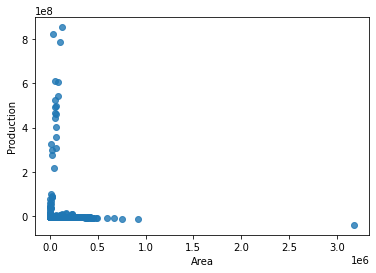

In [48]:
sns.regplot(x = x_test, y = residuals, scatter = True, fit_reg = False, data = crop_data)
residuals.describe()

# Regression diagnostics - Residual plot analysis
Model is not good, mean value is far from predicted value